In [22]:
# Librerías manejo de datos
import numpy as np
import pandas as pd

# Librerías de gráficos
import matplotlib.pyplot as plt
import seaborn as sns

## Carga de datos y ETL

Vamos a cargar un dataset sobre el peso de los niños al nacer.


In [23]:
birth_weight = pd.read_csv('birthweight.csv')

In [24]:
birth_weight.head()

,id,headcirumference,length,Birthweight,Gestation,smoker,motherage,mnocig,mheight,mppwt,fage,fedyrs,fnocig,fheight,lowbwt,mage35,LowBirthWeight
0,1313,12,17,5.8,33,0,24,0,58,99,26,16,0,66,1,0,Low
1,431,12,19,4.2,33,1,20,7,63,109,20,10,35,71,1,0,Low
2,808,13,19,6.4,34,0,26,0,65,140,25,12,25,69,0,0,Normal
3,300,12,18,4.5,35,1,41,7,65,125,37,14,25,68,1,1,Low
4,516,13,18,5.8,35,1,20,35,67,125,23,12,50,73,1,0,Low


In [25]:
birth_weight["Birthweight_kg"]=birth_weight["Birthweight"]*0.453592

### Media

\\[ \mu_{x} = E[x] =  \frac{1}{N} \sum _{i=1}^N x_i\\]

Rellenar con formula y texto

In [26]:
def mean(vector):
    m = 0
    for val in vector:
        m = val+m
    m = m/len(vector)
    return m
mean(birth_weight["Birthweight_kg"])

3.2950218857142866

In [27]:
np.mean(birth_weight["Birthweight_kg"])

3.295021885714286

### Varianza

Es la esperanza del cuadrado de la desviación de dicha variable respecto a su media. Otra definición es la media de los residuos al cuadrado.

Su formula es:

\\[ Var[x] =  \frac{1}{N} \sum _{i=1}^N \left( x_i-\bar{x} \right)^2 \\]

Pero como no sabremos $\bar{x}$ sino que siempre tendremoso que estimar la media E[x] la formula del estimador insesgado de la varianza para una muestra de la población es:

\\[ Var[x] =  \frac{1}{N-1} \sum _{i=1}^N \left( x_i-E[x] \right)^2 \\]


In [28]:
def var(vector):
    m = mean(vector)
    v = 0
    for val in vector:
        v = (val-m)**2 + v
    v = v/(len(vector)-1)
    return v
var(birth_weight["Birthweight_kg"])

0.363800698111214

In [29]:
np.var(birth_weight["Birthweight_kg"],ddof=1)

0.36380069811121396

### Mediana

La mediana es el valor de una distribución tal que la mitad de los elementos son superiores y la mitad son inferiores.

In [30]:
def median(vector: pd.Series) -> float:
    vector = vector.sort_values()
    idx=(len(vector)-1)/2
    if idx==int(idx):
        return vector.iloc[int(idx)]
    else:
        return (vector.iloc[int(np.floor(idx))]+vector.iloc[int(np.ceil(idx))])/2
    
print(median(pd.Series([1,2,3,3.5,4,6])))
print(median(pd.Series([1,2,3,4,6])))


3.25
3


In [31]:
median(birth_weight["Birthweight_kg"])

3.288542

In [32]:
np.median(birth_weight["Birthweight_kg"])

3.288542

### Cuantiles

Los cuantiles suelen usarse por grupos que dividen la distribución en partes iguales; entendidas estas como intervalos que comprenden la misma proporción de valores. Los más usados son:

* Los cuartiles, que dividen a la distribución en cuatro partes (corresponden a los cuantiles 0,25; 0,50 y 0,75);
* Los quintiles, que dividen a la distribución en cinco partes (corresponden a los cuantiles 0,20; 0,40; 0,60 y 0,80);
* Los deciles, que dividen a la distribución en diez partes;
* Los percentiles, que dividen a la distribución en cien partes.


In [12]:
np.quantile(birth_weight["Birthweight_kg"],[0.25,0.5,0.75])

array([2.9256684, 3.288542 , 3.628736 ])

### Boxplot

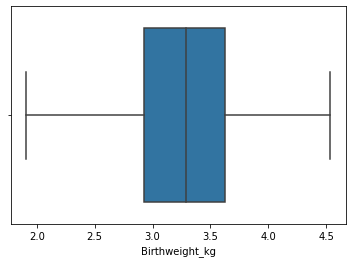

In [13]:
sns.boxplot(x=birth_weight["Birthweight_kg"])

### Histograma

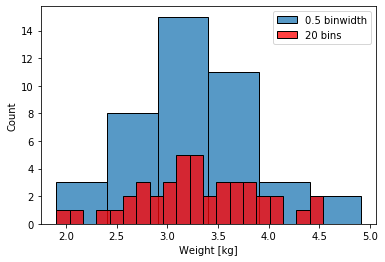

In [37]:
sns.histplot(birth_weight["Birthweight_kg"], binwidth=0.5,label="0.5 binwidth")
sns.histplot(birth_weight["Birthweight_kg"], bins=20,color="red",label="20 bins")
plt.xlabel("Weight [kg]")
plt.legend()

### Curva de densidad (kernel density estimation)

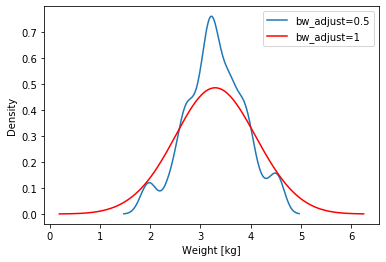

In [41]:
sns.kdeplot(birth_weight["Birthweight_kg"], bw_adjust=0.5,label="bw_adjust=0.5")
sns.kdeplot(birth_weight["Birthweight_kg"], bw_adjust=2,color="red",label="bw_adjust=1")
plt.xlabel("Weight [kg]")
plt.legend()

### Violin plot

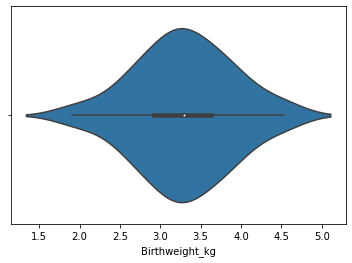

In [51]:
sns.violinplot(data=birth_weight,x="Birthweight_kg")

# Tests estadísticos

¿Es la media de estas dos poblaciones iguales?

In [57]:
weight_NO_smoke = birth_weight.loc[birth_weight["smoker"]==0,"Birthweight_kg"]
weight_YES_smoke = birth_weight.loc[birth_weight["smoker"]==1,"Birthweight_kg"]

In [58]:
weight_NO_smoke.describe()

count    20.000000
mean      3.488122
std       0.520701
min       2.630834
25%       3.118445
50%       3.356581
75%       3.900891
max       4.535920
Name: Birthweight_kg, dtype: float64

In [59]:
weight_YES_smoke.describe()

count    22.000000
mean      3.119476
std       0.630217
min       1.905086
25%       2.721552
50%       3.175144
75%       3.526678
max       4.535920
Name: Birthweight_kg, dtype: float64

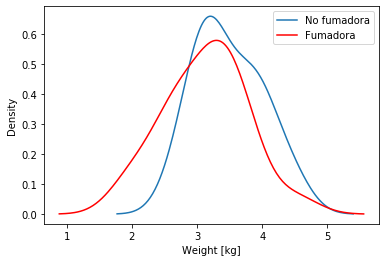

In [60]:
sns.kdeplot(weight_NO_smoke,label="No fumadora")
sns.kdeplot(weight_YES_smoke,color="red",label="Fumadora")
plt.xlabel("Weight [kg]")
plt.legend()

¿Cómo de probable es que estos cambios hayan ocurrido al azar?

# Regresiones lineales

In [ ]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(birth_weight,test_size=0.33, random_state=42)

In [ ]:
from statsmodels.formula.api import ols

In [ ]:
train.head()

In [ ]:
model = ols(formula='Birthweight_kg ~ mheight + motherage + fheight + fage + mnocig', data=birth_weight)
res = model.fit()
print(res.summary())

In [ ]:
model = ols(formula='Birthweight_kg ~ mheight +  mnocig', data=birth_weight)
res = model.fit()
print(res.summary())